<a href="https://colab.research.google.com/github/kimgeonhee317/nlpdemystifed-notes/blob/main/notebook/12_Word_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U gensim==4.*

# New Section

# Using Pretrained, Third-Party Vectors

In [ ]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf

from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!gdown "https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku"

Downloading...
From: https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:06<00:00, 261MB/s]


In [ ]:
embedding_file = './GoogleNews-vectors-negative300.bin.gz'

In [ ]:
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=200000)

CPU times: user 3.95 s, sys: 206 ms, total: 4.16 s
Wall time: 4.49 s


In [ ]:
pizza = word_vectors['pizza']
print(f'Vector dimension: {pizza.shape}')
print(pizza)

Vector dimension: (300,)
[-1.25976562e-01  2.53906250e-02  1.66992188e-01  5.50781250e-01
 -7.66601562e-02  1.28906250e-01  1.02539062e-01 -3.94821167e-04
  1.21582031e-01  4.32128906e-02  1.72851562e-01 -6.83593750e-02
  3.41796875e-01  8.39843750e-02  6.68945312e-02  2.67578125e-01
 -3.71093750e-02 -5.56640625e-02  1.80664062e-01  1.90429688e-02
 -5.07812500e-02  9.03320312e-03  1.76757812e-01  6.49414062e-02
 -6.25000000e-02 -9.42382812e-02 -9.71679688e-02  4.00390625e-01
  1.15234375e-01  1.02539062e-01 -1.86767578e-02 -2.69531250e-01
  1.80664062e-01  1.25000000e-01 -3.17382812e-02 -5.49316406e-02
  3.45703125e-01 -1.57470703e-02  1.82390213e-05  2.07031250e-01
 -1.25976562e-01 -2.83203125e-01  2.00195312e-01  8.34960938e-02
 -4.73632812e-02 -3.11279297e-02 -2.61718750e-01  1.69921875e-01
 -2.02636719e-02  1.53320312e-01 -1.20605469e-01  3.75000000e-01
 -5.68847656e-02 -4.76074219e-03 -1.95312500e-01 -2.03125000e-01
  3.00781250e-01 -1.01074219e-01 -3.18359375e-01 -9.03320312e-02


In [ ]:
print(word_vectors.similarity('pizza', 'gorilla'))
print(word_vectors.similarity('pizza', 'tree'))
print(word_vectors.similarity('pizza', 'yoga'))

0.108518735
0.11185601
0.14119941


In [ ]:
try:
  word_vectors['womblyboo']
except KeyError as e :
  print(e)

"Key 'womblyboo' not present"


In [ ]:
word_vectors.n_similarity("dog bites man".split(), "canine nips human".split())

0.5314661

In [ ]:
word_vectors.n_similarity("dog bites man".split(), "man bites dogs".split())

0.96640766

In [ ]:
word_vectors.most_similar(positive=['Seoul'], topn=10)

[('South_Korea', 0.722474217414856),
 ('South_Korean', 0.7076618075370789),
 ('Busan', 0.706099808216095),
 ('Pyongyang', 0.699173092842102),
 ('Tokyo', 0.6930851936340332),
 ('Incheon', 0.6747581362724304),
 ('Korea', 0.6671159863471985),
 ('Korean', 0.6570852994918823),
 ('Gwangju', 0.646643877029419),
 ('Daejeon', 0.6390956044197083)]

In [ ]:
word_vectors.doesnt_match(["apple", "orange", "hamburger", "banana", "kiwi"])

'hamburger'

In [ ]:
word_vectors.doesnt_match(["Microsoft", "Apple", "Hyundai", "Amazon", "Netflix", "Google"])

'Hyundai'

In [ ]:
def display_pca_scatterplot(model, words):
  word_vectors = np.array([model[w] for w in words])

  twodim = PCA().fit_transform(word_vectors)[:, :2] # until second col

  plt.figure(figsize=(10,10))
  plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r', s=64)
  for word, (x,y) in zip(words, twodim): # word for each points
    plt.text(x+0.05, y+0.05, word)

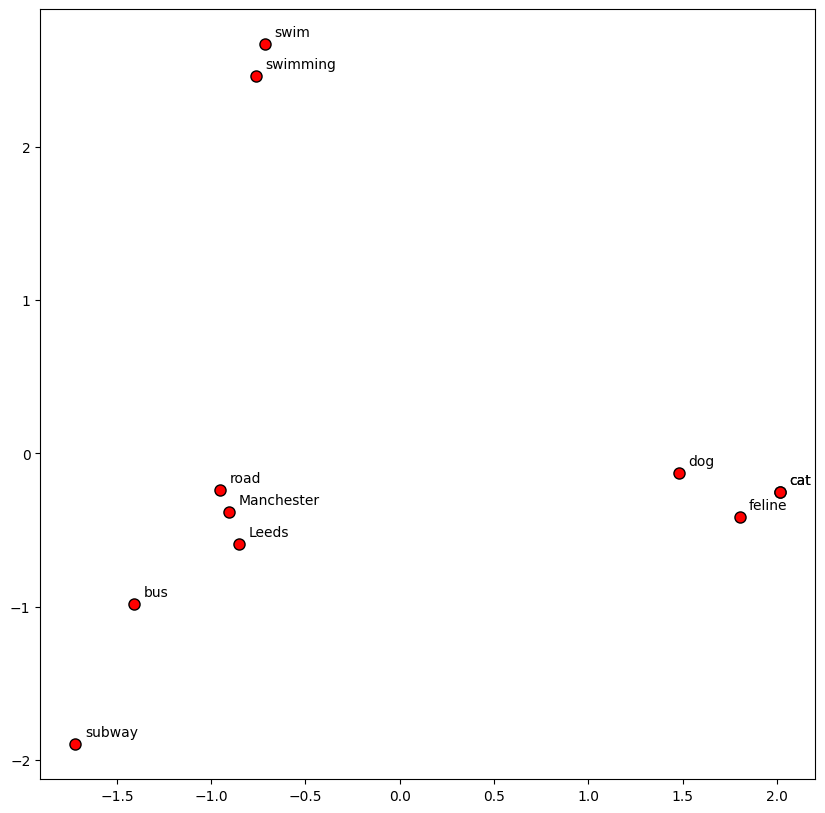

In [ ]:
words = ["swim", "swimming", "cat", "dog", "feline", "road", "cat", "bus", "subway", "Manchester", "Leeds"]
display_pca_scatterplot(word_vectors, words)

In [ ]:
word_vectors.most_similar(positive=['Italy', 'London'], negative=['Rome'], topn=3)

[('UK', 0.6230568885803223),
 ('Britain', 0.6016390323638916),
 ('United_Kingdom', 0.534345805644989)]

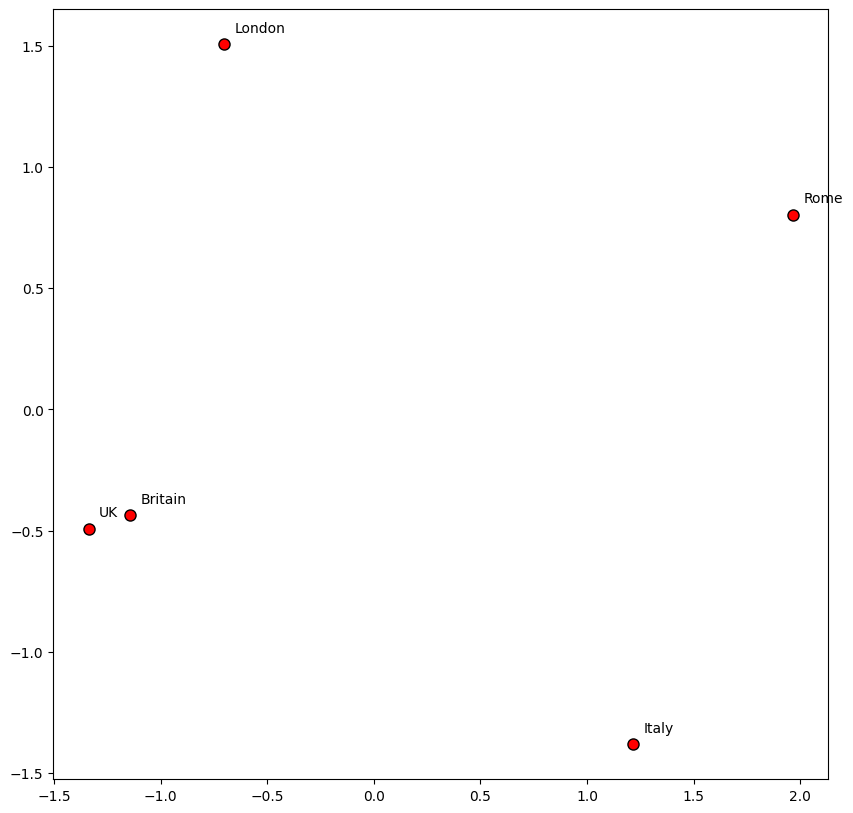

In [ ]:
display_pca_scatterplot(word_vectors, ["Rome", 'Italy', 'London', 'Britain', 'UK'])

# Using Pretrained Word Vectors for Classification

# New Section

In [ ]:
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=1000000)

CPU times: user 16.5 s, sys: 773 ms, total: 17.2 s
Wall time: 17.3 s


In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz"

--2023-08-05 15:01:49--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.69.248, 52.217.48.38, 16.182.71.96, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.69.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166373201 (159M) [application/x-tar]
Saving to: ‘/root/input/yelp_review_polarity_csv.tgz’

yelp_review_polarit 100%[===================>] 158.67M  59.0MB/s    in 2.7s    

2023-08-05 15:01:51 (59.0 MB/s) - ‘/root/input/yelp_review_polarity_csv.tgz’ saved [166373201/166373201]



In [ ]:
!tar xvzf /root/input/yelp_review_polarity_csv.tgz
!pwd

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv
/content


In [ ]:
yelp_train = pd.read_csv('yelp_review_polarity_csv/train.csv', names=['sentiment', 'review'])
print(yelp_train.shape)

(560000, 2)


In [ ]:
yelp_train

,sentiment,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [ ]:
TRAIN_SIZE = 100000
yelp_train = yelp_train.sample(frac=1, random_state=412)[:TRAIN_SIZE].copy()
print(yelp_train.shape)

(100000, 2)


In [ ]:
yelp_train['sentiment'].replace(to_replace=1, value=0, inplace=True)
yelp_train['sentiment'].replace(to_replace=2, value=1, inplace=True)

In [ ]:
yelp_train.head()

,sentiment,review
502542,1,There seems to be a long wait and the prices a...
148794,1,Located in the Venetian hotel - this restauran...
8934,0,This place doesn't come close to living up to ...
86893,0,I wanted to write a review concerning a recent...
472166,1,I am so glad I found this place!! Extremely fa...


In [ ]:
yelp_train_split, yelp_val_split = train_test_split(yelp_train, train_size=0.85, random_state=1)

In [ ]:
#train
train_reviews = yelp_train_split['review']
y_train = np.array(yelp_train_split['sentiment'])

In [ ]:
#val
val_reviews = yelp_val_split['review']
y_val = np.array(yelp_val_split['sentiment'])

In [ ]:
collections.Counter(y_train)

Counter({1: 42642, 0: 42358})

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=20000,
                                               filters='0123456789!#$%^&*()_+,./:;<=>?[\]`{|}\'~',
                                               lower=True)

In [ ]:
%%time
tokenizer.fit_on_texts(train_reviews)

CPU times: user 8.65 s, sys: 40.5 ms, total: 8.69 s
Wall time: 8.74 s


In [ ]:
X_train = tokenizer.texts_to_sequences(train_reviews)

In [ ]:
len(X_train[0])

109

In [ ]:
[tokenizer.index_word[x] for x in X_train[0][:3]]

["it's", 'definitely', 'cheap']

In [ ]:
tokenizer.sequences_to_texts([X_train[0]])[0]

'it s definitely cheap compared to other hotels in dt phoenix we weren t in the hotel much anyway because we were traveling n nas with any hotel - you get what you pay for the hotel is old n n-the shower water was cold the first night that we got there interestingly they give you body lotion shampoo body wash and soap maybe it s to make up for everything else in the bathroom being so old n n-there s a nice little pool with chairs and space on an open air roof n noverall a good experience and i would highly recommend it to the budget traveler'

In [ ]:
# Original review text
train_reviews.iloc[0]

"It's definitely cheap compared to other hotels in DT Phoenix.  We weren't in the hotel much anyway because we were traveling.\\n\\nAs with any hotel - you get what you pay for.  The hotel is old.\\n\\n-The shower water was cold the first night that we got there.  Interestingly they give you Rusk body lotion, shampoo, body wash, and soap.  Maybe it's to make up for everything else in the bathroom being so old.\\n\\n-There's a nice little pool with chairs and space on an open air roof.\\n\\nOverall a good experience and I would highly recommend it to the budget traveler."

In [ ]:
# We need to pad the review vector to make its length infused as same length

MAX_REVIEW_LEN = 200
X_train = keras.utils.pad_sequences(X_train, maxlen=MAX_REVIEW_LEN)


In [ ]:
print(X_train[0])
print(X_train[1])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     7    25   173   446  1177
     4    85  1104    10 14750   640    15   612    21    10     1   206
   108   885    76    15    28  2994    12   978    20   137   206    74
    16    44    64    16   276     9     1   206    11   261    12  3761
  1154   296     6   381     1   109   134    13    15    82    33 10588
    18   164    16  1684  4784  4053  1684  1041     2  3291   277     7
    25     4   132    54     9   189   257    10   

In [ ]:
X_val = tokenizer.texts_to_sequences(val_reviews)
X_val = keras.utils.pad_sequences(X_val, maxlen=MAX_REVIEW_LEN)

In [ ]:
print(tokenizer.word_index['good'])

36


In [ ]:
print(tokenizer.index_word[36])

good


In [ ]:
print(word_vectors[tokenizer.index_word[36]][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [ ]:
# number of tokens
num_tokens = len(tokenizer.word_index)+1

# Initialize a matrix of zeros of size : vocab * embedding dimension
embedding_dim = 300
embedding_matrix = np.zeros((num_tokens, embedding_dim))

# put words vector into embedding matrix
for word, i in tokenizer.word_index.items():
  if word_vectors.has_index_for(word):
    embedding_matrix[i] = word_vectors[word].copy()

In [ ]:
print(embedding_matrix[tokenizer.word_index['good']][:50]) # look-up the word 'good'

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [ ]:
# keras embedding layer
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=True
)

In [ ]:
tf.random.set_seed(0)

model = keras.Sequential()

# This layer will output a squence of 300-demension word vector,
# one for each element in the input sequence
model.add(embedding_layer)

# This layer will calculate an average of those vectors
model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dense(128, activation='relu', kernel_initializer = tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(64, activation='relu', kernel_initializer = tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer = tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
review = "fantastic papaya steak"
print(f"Review : {review}")

review_sequences = tokenizer.texts_to_sequences([review])
print(f"Review as sequence of integers: {review_sequences}")

review_embeddings= embedding_layer(np.array(review_sequences))
print(f"Review embeddings shape: (Batch Size: {review_embeddings.shape[0]}, \
Sequence length: {review_embeddings.shape[1]},\
Embedding size : {review_embeddings.shape[2]})")

# How our document will be presented to the rest part of neural net, just averaging
print(f"Average of embeddings (Shape): {np.mean(review_embeddings, axis=1).shape}")


Review : fantastic papaya steak
Review as sequence of integers: [[546, 5644, 314]]
Review embeddings shape: (Batch Size: 1, Sequence length: 3,Embedding size : 300)
Average of embeddings (Shape): (1, 300)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          32955300  
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,002,149
Trainable params: 33,002,149
Non-trainable params: 0
__________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
167/167 [==============================] - 3s 19ms/step - loss: 0.1611 - accuracy: 0.9410 - val_loss: 0.2031 - val_accuracy: 0.9237
Epoch 2/20
167/167 [==============================] - 14s 83ms/step - loss: 0.1392 - accuracy: 0.9494 - val_loss: 0.2081 - val_accuracy: 0.9175
Epoch 3/20
167/167 [==============================] - 22s 128ms/step - loss: 0.1251 - accuracy: 0.9552 - val_loss: 0.2304 - val_accuracy: 0.9138
Epoch 4/20
167/167 [==============================] - 14s 85ms/step - loss: 0.1126 - accuracy: 0.9606 - val_loss: 0.2213 - val_accuracy: 0.9199
Epoch 5/20
167/167 [==============================] - 10s 60ms/step - loss: 0.1041 - accuracy: 0.9641 - val_loss: 0.2358 - val_accuracy: 0.9186
Epoch 6/20
167/167 [==============================] - 8s 45ms/step - loss: 0.0968 - accuracy: 0.9669 - val_loss: 0.2421 - val_accuracy: 0.9158
Epoch 7/20
167/167 [==============================] - 9s 52ms/step - loss: 0.0901 - accuracy: 0.9697 - val_loss: 0.3329 - val_accuracy: 0